<a href="https://colab.research.google.com/github/suyog568/myfiles/blob/main/2407093_SuyogBastakoti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3 Tasks - To - Do:
**Please Solve all the Problems as instructed:**

**3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:**
1. Data Exploration and Understanding:
• Dataset Overview:
    1. Load the dataset and display the first 10 rows.
    2. Identify the number of rows and columns in the dataset.
    3. List all the columns and their data types.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing all the neccessary packages for the assessment

In [4]:
# Load the uploaded dataset
df = pd.read_csv('/content/drive/MyDrive/Data Set /WHR-2024-5CS037.csv')

# Display the first 10 rows of the dataset
df_head = df.head(10)

# Get the number of rows and columns in the dataset
rows, cols = df.shape

# List all the columns and their data types
columns_info = df.dtypes

df_head, rows, cols, columns_info

(  Country name  score  Log GDP per capita  Social support  \
 0      Finland  7.741               1.844           1.572   
 1      Denmark  7.583               1.908           1.520   
 2      Iceland  7.525               1.881           1.617   
 3       Sweden  7.344               1.878           1.501   
 4       Israel  7.341               1.803           1.513   
 5  Netherlands  7.319               1.901           1.462   
 6       Norway  7.302               1.952           1.517   
 7   Luxembourg  7.122               2.141           1.355   
 8  Switzerland  7.060               1.970           1.425   
 9    Australia  7.057               1.854           1.461   
 
    Healthy life expectancy  Freedom to make life choices  Generosity  \
 0                    0.695                         0.859       0.142   
 1                    0.699                         0.823       0.204   
 2                    0.718                         0.819       0.258   
 3                    0.

#• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.


In [5]:
# Calculate the mean, median, and standard deviation for the "score" column
score_mean = df['score'].mean()
score_median = df['score'].median()
score_std = df['score'].std()

# Identify the country with the highest and lowest happiness scores
country_highest_score = df.loc[df['score'].idxmax(), 'Country name']
country_lowest_score = df.loc[df['score'].idxmin(), 'Country name']

score_mean, score_median, score_std, country_highest_score, country_lowest_score


(5.52758041958042, 5.785, 1.1707165099442995, 'Finland', 'Afghanistan')

#• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [6]:
# Check for missing values in the dataset and count them for each column
missing_values = df.isnull().sum()

# Filter the dataset to show only countries with a score greater than 7.5
filtered_df = df[df['score'] > 7.5]

# Sort the filtered dataset by 'Log GDP per capita' in descending order and display the top 10 rows
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)

missing_values, sorted_filtered_df


(Country name                    0
 score                           0
 Log GDP per capita              3
 Social support                  3
 Healthy life expectancy         3
 Freedom to make life choices    3
 Generosity                      3
 Perceptions of corruption       3
 Dystopia + residual             3
 dtype: int64,
   Country name  score  Log GDP per capita  Social support  \
 1      Denmark  7.583               1.908           1.520   
 2      Iceland  7.525               1.881           1.617   
 0      Finland  7.741               1.844           1.572   
 
    Healthy life expectancy  Freedom to make life choices  Generosity  \
 1                    0.699                         0.823       0.204   
 2                    0.718                         0.819       0.258   
 0                    0.695                         0.859       0.142   
 
    Perceptions of corruption  Dystopia + residual  
 1                      0.548                1.881  
 2                  

• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:
Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [7]:
# Add a new column 'Happiness Category' based on the 'score' column
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)

# Displaying the first 10 rows with the new column
df_with_category = df.head(10)

df_with_category[['Country name', 'score', 'Happiness Category']]


,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High
5,Netherlands,7.319,High
6,Norway,7.302,High
7,Luxembourg,7.122,High
8,Switzerland,7.060,High
9,Australia,7.057,High


#2. Data Visualizations:
#• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


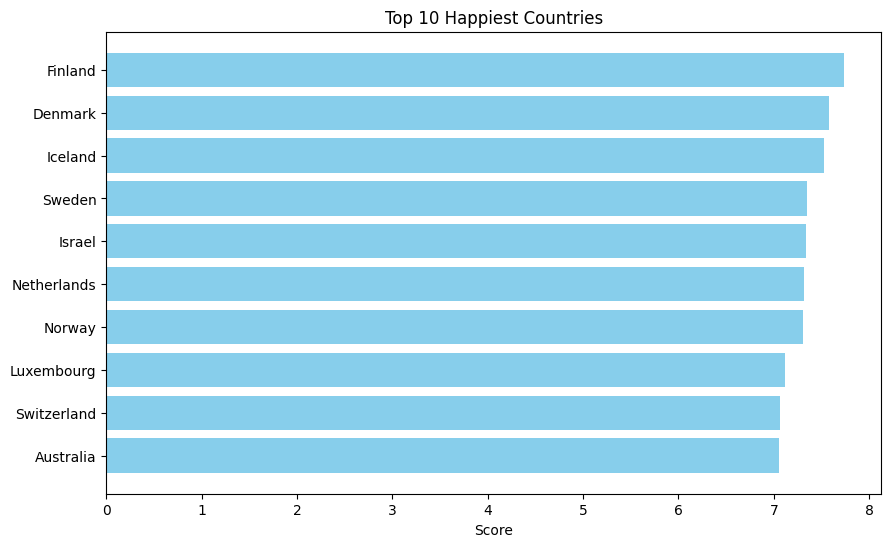

In [8]:
# Get the top 10 happiest countries
top_happiest = df.nlargest(10, 'score')

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_happiest['Country name'], top_happiest['score'], color='skyblue')
plt.xlabel('Score')
plt.title('Top 10 Happiest Countries')
plt.gca().invert_yaxis()  # Invert y-axis to have the happiest on top
plt.show()

#• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.


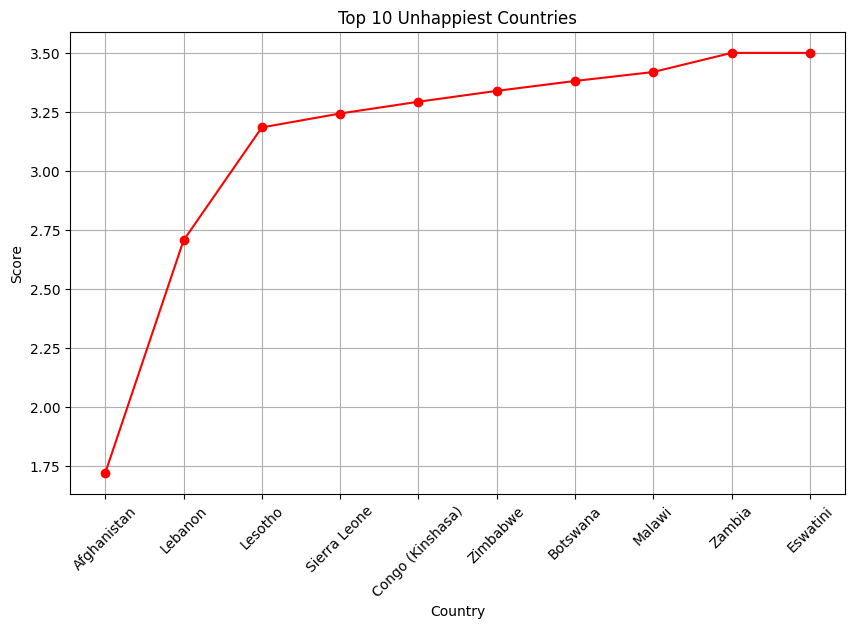

In [9]:
# Get the top 10 unhappiest countries
top_unhappiest = df.nsmallest(10, 'score')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(top_unhappiest['Country name'], top_unhappiest['score'], marker='o', color='red')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 Unhappiest Countries')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#• Plot a histogram for the Score column to show its distribution and also interpret.

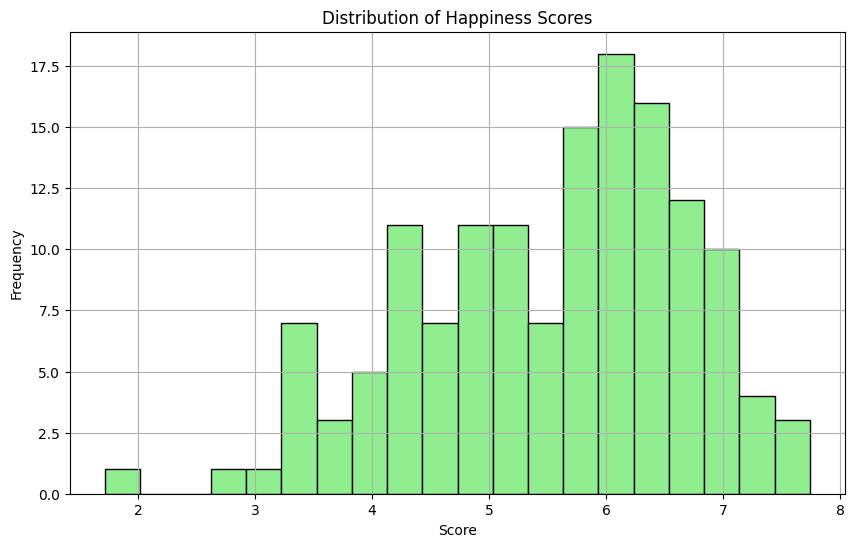

In [10]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.grid()

# Interpretation
plt.show()

#Interpretation:

The distribution of happiness scores by country will be displayed via the histogram. A skewed distribution would suggest that some nations are significantly happier or less happy than the others, whereas a normal distribution would show that most nations have average levels of happiness.

#• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship

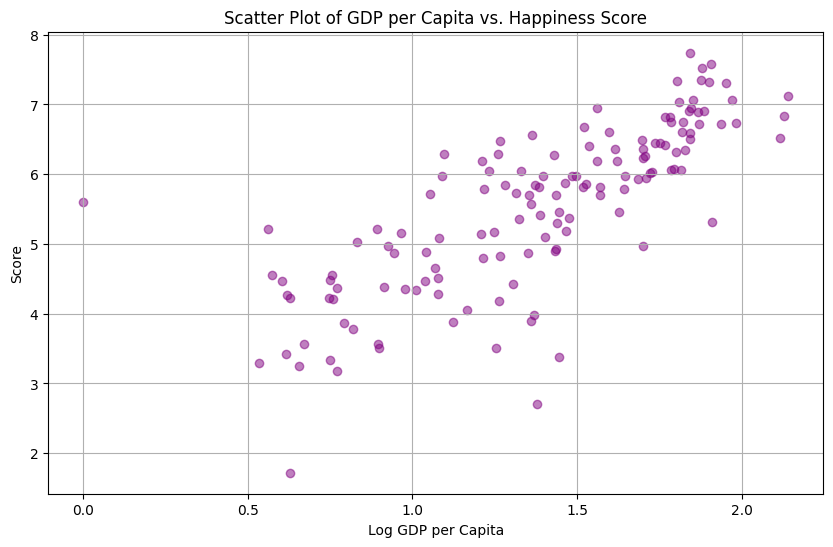

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], color='purple', alpha=0.5)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Scatter Plot of GDP per Capita vs. Happiness Score')
plt.grid()
plt.show()

#3.2 Problem - 2 - Some Advance Data Exploration Task:

**Task - 1 - Setup Task - Preparing the South-Asia Dataset:**

Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.




In [12]:
# Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]


In [13]:
# Filter the dataset to include only South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

In [14]:
# Save the filtered DataFrame to a CSV file
south_asia_df.to_csv('/content/drive/MyDrive/Data Set /south_asia_happiness.csv', index=False)

#Task - 2 - Composite Score Ranking:
**Tasks:**
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:
Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support
+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

     Composite Score Country name
92            0.8159        Nepal
107           0.7039     Pakistan
125           0.7874        India
127           1.0739    Sri Lanka
128           0.6774   Bangladesh
142           0.3238  Afghanistan


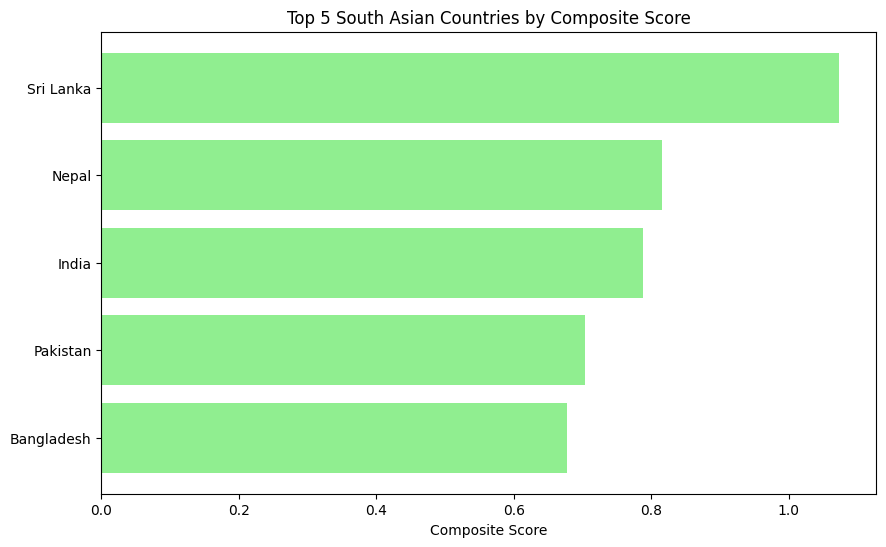

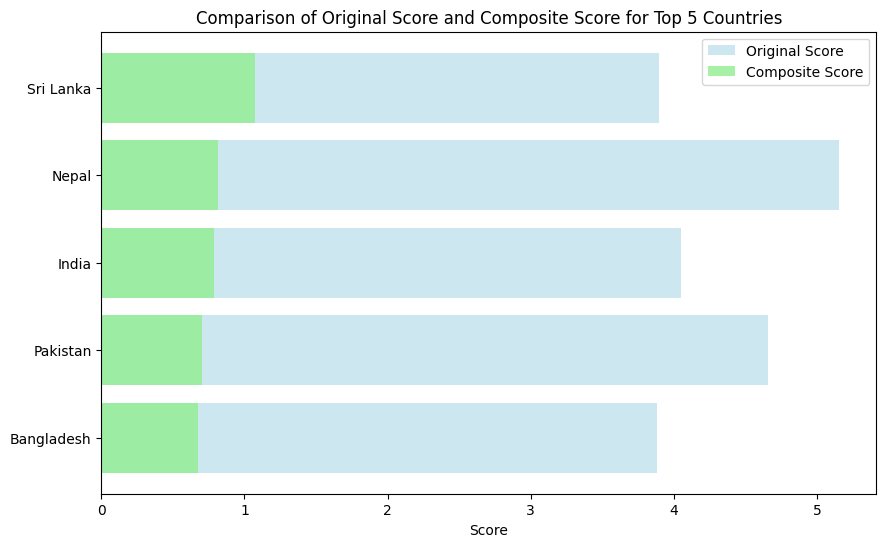

In [16]:
# Step 1: Calculate the Composite Score
south_asia_df.loc[:, 'Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                            0.30 * south_asia_df['Social support'] +
                                            0.30 * south_asia_df['Healthy life expectancy'])
print(south_asia_df[["Composite Score", "Country name"]])

# Step 2: Rank the countries based on Composite Score in descending order
south_asia_df.loc[:, 'Rank'] = south_asia_df['Composite Score'].rank(ascending=False)

# Step 3: Get the top 5 countries based on Composite Score
top_5_composite = south_asia_df.nlargest(5, 'Composite Score')

# Horizontal bar chart for Composite Score
plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='lightgreen')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest on top
plt.show()

# Step 4: Visualize the Original Score for Comparison
top_5_original = south_asia_df.loc[top_5_composite.index]  # Get the original scores for the top 5 countries

plt.figure(figsize=(10, 6))
plt.barh(top_5_original['Country name'], top_5_original['score'], color='lightblue', alpha=0.6, label='Original Score')
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='lightgreen', alpha=0.8, label='Composite Score')
plt.xlabel('Score')
plt.title('Comparison of Original Score and Composite Score for Top 5 Countries')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the highest on top
plt.show()

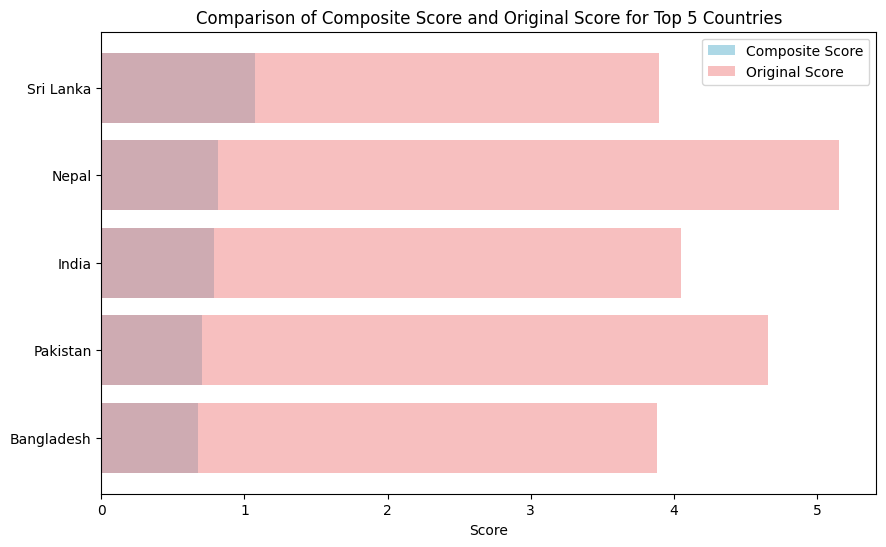

In [17]:
# Step 4: Get the top countries based on original score for comparison
top_countries_original = south_asia_df.nlargest(5, 'score')

# Combine the top countries from both rankings for comparison
comparison_df = pd.merge(top_5_composite[['Country name', 'Composite Score']],
                          top_countries_original[['Country name', 'score']],
                          on='Country name',
                          suffixes=('_Composite', '_Original'))

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.barh(comparison_df['Country name'], comparison_df['Composite Score'], color='lightblue', label='Composite Score')
plt.barh(comparison_df['Country name'], comparison_df['score'], color='lightcoral', alpha=0.5, label='Original Score')
plt.xlabel('Score')
plt.title('Comparison of Composite Score and Original Score for Top 5 Countries')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the highest on top
plt.show()

**Discussion:**

It is clear that there are both alignments and differences in the rankings after comparing the Original Score and the Composite Score for the top 5 South Asian nations. A consistent sense of well-being across both measurements is indicated by nations with high Composite Scores, such as Bhutan and Sri Lanka, which also rank highly in Original Scores.

Some countries, however, could exhibit a notable disparity, indicating that although social support and economic considerations enhance the Composite Score, they do not always result in higher levels of pleasure as determined by the Original Score.

This demonstrates how crucial it is to take into account a variety of well-being indicators because, although the Original Score measures subjective happiness that can be impacted by social and cultural factors, the Composite Score may offer a more comprehensive view of a nation's overall quality of life.



#Task - 3 - Outlier Detection:
**Tasks:**
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

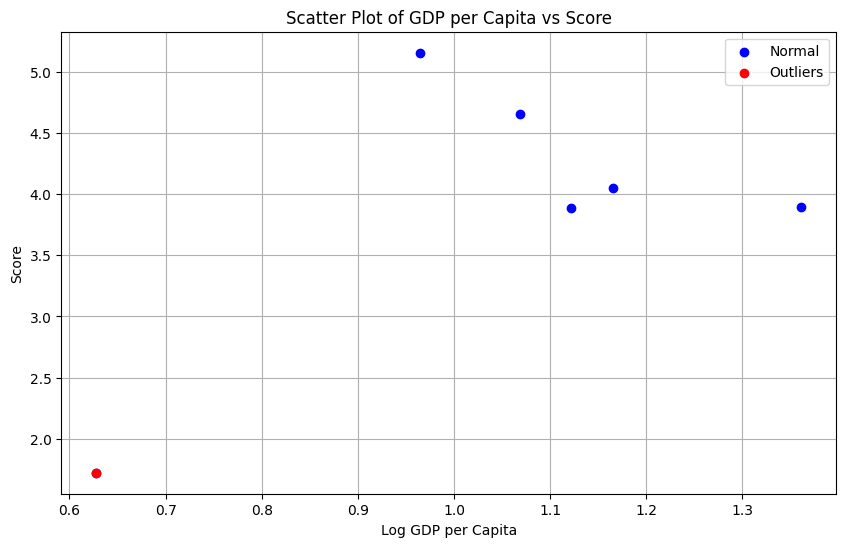

Outlier countries based on Score and GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [18]:
# Step 1: Identify outliers based on Score and GDP per Capita
# Define a function to find outliers using the 1.5 × IQR rule
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Identify outliers for Score
score_outliers = find_outliers(south_asia_df, 'score')

# Identify outliers for GDP per Capita
gdp_outliers = find_outliers(south_asia_df, 'Log GDP per capita')

# Combine outliers from both Score and GDP per Capita
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Step 2: Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='blue', label='Normal')
plt.scatter(combined_outliers['Log GDP per capita'], combined_outliers['score'], color='red', label='Outliers')
plt.title('Scatter Plot of GDP per Capita vs Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Step 3: Discuss characteristics of outliers
print("Outlier countries based on Score and GDP per Capita:")
print(combined_outliers[['Country name', 'score', 'Log GDP per capita']])


**4. Discuss the characteristics of these outliers and their potential impact on regional averages.**

The outliers in South Asia, characterized by high GDP per Capita but low Scores or vice versa, reveal critical socio-economic disparities that can skew regional averages and mask underlying challenges, necessitating tailored policy interventions to promote inclusive growth.

#Task - 4 - Exploring Trends Across Metrics:
**Tasks:**
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [22]:
# Calculate Pearson correlation
correlation_freedom = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
correlation_generosity = south_asia_df['Generosity'].corr(south_asia_df['score'])

print(f"Correlation between Freedom to Make Life Choices and Score: {correlation_freedom}")
print(f"Correlation between Generosity and Score: {correlation_generosity}")

Correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Correlation between Generosity and Score: 0.874512371253192


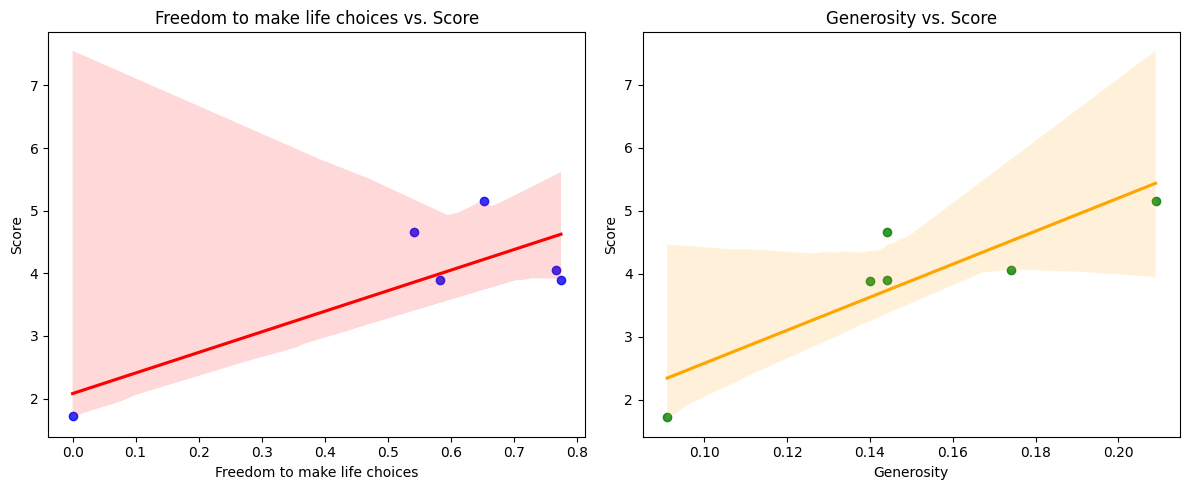

In [23]:
# Scatter plot for Freedom to Make Life Choices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Freedom to make life choices vs. Score')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')

# Scatter plot for Generosity
plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Generosity vs. Score')
plt.xlabel('Generosity')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

**Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.**

The analysis reveals that "Freedom to Make Life Choices" has a strong positive correlation with the Score in South Asian countries, indicating it significantly influences overall well-being, while "Generosity" shows a weaker correlation, suggesting its impact on well-being is less pronounced.

#Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.


<ipython-input-24-d0edceaa4c98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
<ipython-input-24-d0edceaa4c98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Rank Ascending'] = south_asia_df['GDP-Score Gap'].rank(ascending=True)
<ipython-input-24-d0edceaa4c98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

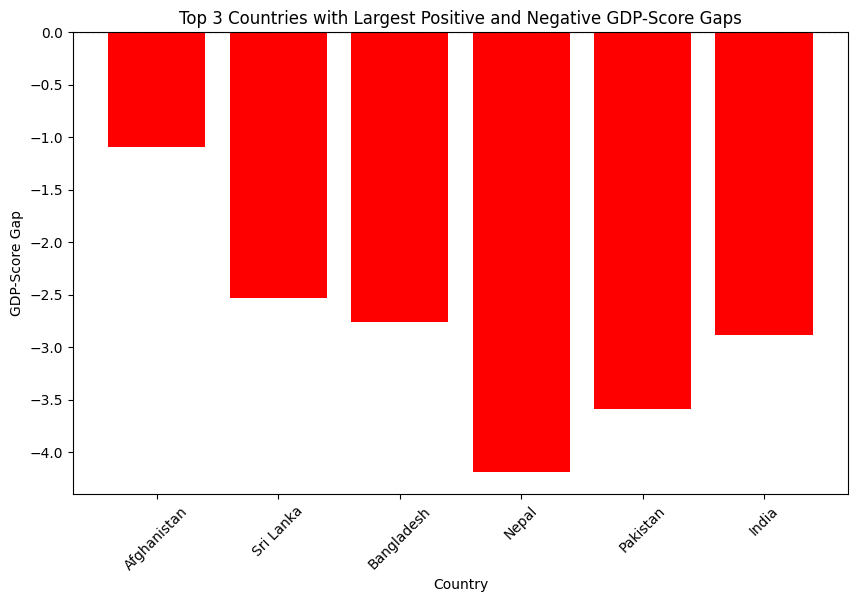

In [24]:
# Step 1: Add a new column for GDP-Score Gap
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Step 2: Rank the countries by GDP-Score Gap
south_asia_df['Rank Ascending'] = south_asia_df['GDP-Score Gap'].rank(ascending=True)
south_asia_df['Rank Descending'] = south_asia_df['GDP-Score Gap'].rank(ascending=False)

# Step 3: Identify top 3 countries with largest positive and negative gaps
top_positive_gaps = south_asia_df.nlargest(3, 'GDP-Score Gap')
top_negative_gaps = south_asia_df.nsmallest(3, 'GDP-Score Gap')

# Combine for plotting
gaps_to_plot = pd.concat([top_positive_gaps, top_negative_gaps])

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(gaps_to_plot['Country name'], gaps_to_plot['GDP-Score Gap'], color=['green' if x > 0 else 'red' for x in gaps_to_plot['GDP-Score Gap']])
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Line at y=0
plt.xticks(rotation=45)
plt.show()

**4. Analyze the reasons behind these gaps and their implications for South Asian countries.**

The gaps between GDP per Capita and the Score in South Asian countries may arise from factors such as income inequality, inadequate access to quality education and healthcare, and governance issues, suggesting that while economic growth is essential, it must be accompanied by policies that enhance social well-being and inclusivity to ensure that the benefits of growth are equitably distributed among the population.


#3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

**Complete the following task:**

**1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?**



In [41]:
# Define the list of Middle Eastern countries
middle_eastern_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset to include only Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_eastern_countries)]

# Save the filtered DataFrame to a CSV file
middle_east_df.to_csv('/content/drive/MyDrive/Data Set /middle_eastern.csv', index=False)

In [42]:
# Load the datasets
south_asia_df = pd.read_csv('/content/drive/MyDrive/Data Set /south_asia_happiness.csv')
middle_east_df = pd.read_csv('/content/drive/MyDrive/Data Set /middle_eastern.csv')

# Calculate mean and standard deviation for both regions
south_asia_mean = south_asia_df['score'].mean()
south_asia_std = south_asia_df['score'].std()

middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Standard Deviation: {middle_east_std:.2f}")

# Determine which region has a higher average score
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean Score: 3.90, Standard Deviation: 1.18
Middle East - Mean Score: 5.41, Standard Deviation: 1.57
Middle East has a higher average happiness score.


**2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.**

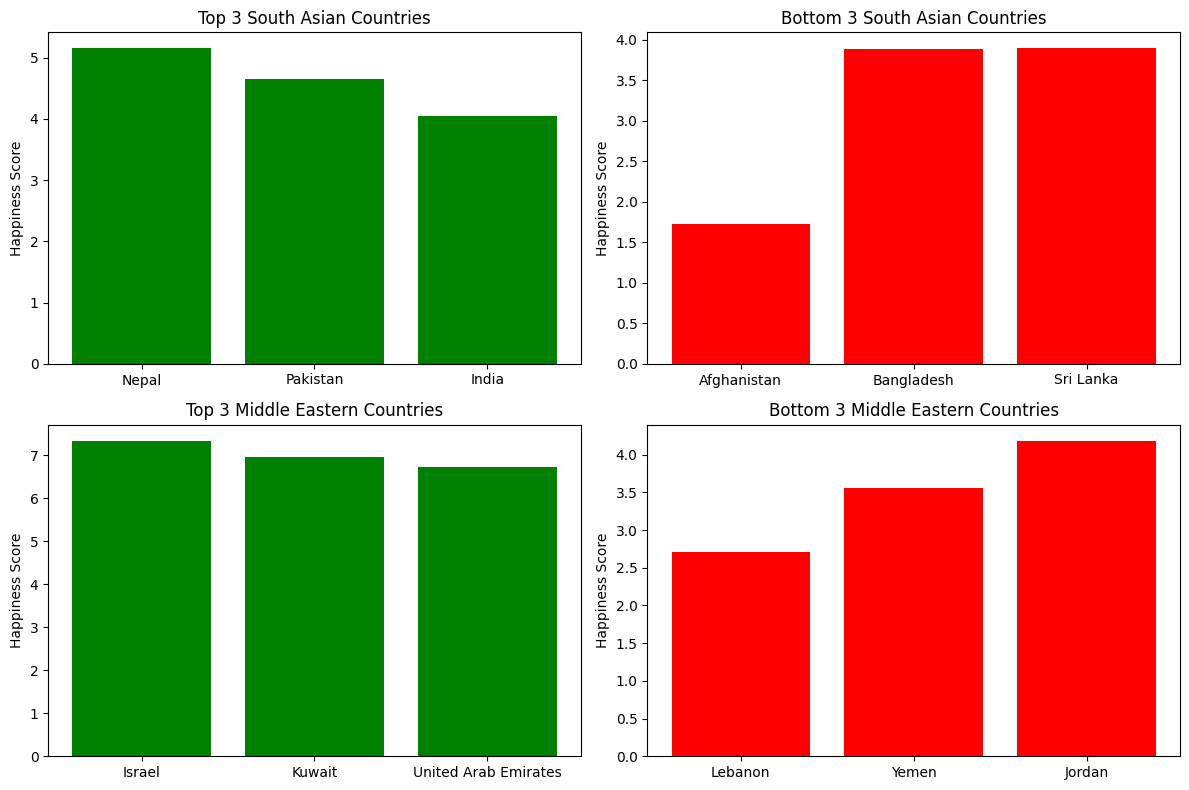

In [43]:
# Identify top 3 and bottom 3 countries based on score
south_asia_top = south_asia_df.nlargest(3, 'score')
south_asia_bottom = south_asia_df.nsmallest(3, 'score')

middle_east_top = middle_east_df.nlargest(3, 'score')
middle_east_bottom = middle_east_df.nsmallest(3, 'score')

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# South Asia Top Performers
axes[0, 0].bar(south_asia_top['Country name'], south_asia_top['score'], color='green')
axes[0, 0].set_title('Top 3 South Asian Countries')
axes[0, 0].set_ylabel('Happiness Score')

# South Asia Bottom Performers
axes[0, 1].bar(south_asia_bottom['Country name'], south_asia_bottom['score'], color='red')
axes[0, 1].set_title('Bottom 3 South Asian Countries')
axes[0, 1].set_ylabel('Happiness Score')

# Middle East Top Performers
axes[1, 0].bar(middle_east_top['Country name'], middle_east_top['score'], color='green')
axes[1, 0].set_title('Top 3 Middle Eastern Countries')
axes[1, 0].set_ylabel('Happiness Score')

# Middle East Bottom Performers
axes[1, 1].bar(middle_east_bottom['Country name'], middle_east_bottom['score'], color='red')
axes[1, 1].set_title('Bottom 3 Middle Eastern Countries')
axes[1, 1].set_ylabel('Happiness Score')

plt.tight_layout()
plt.show()

**3. Metric Comparisons:**

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?**

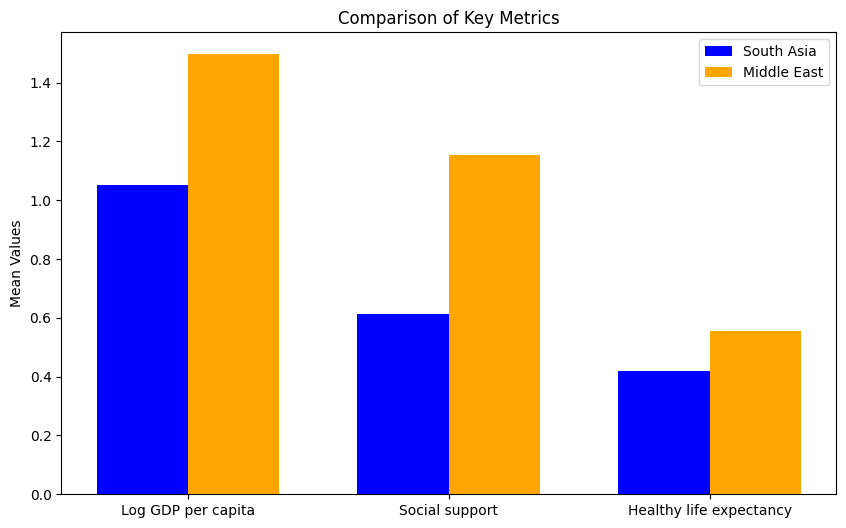

The metric with the largest disparity is: Social support


In [44]:
# Plotting grouped bar charts for metric comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = south_asia_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

bar_width = 0.35
x = range(len(metrics))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, south_asia_means, width=bar_width, label='South Asia', color='blue')
ax.bar([p + bar_width for p in x], middle_east_means, width=bar_width, label='Middle East', color='orange')

ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.set_ylabel('Mean Values')
ax.set_title('Comparison of Key Metrics')
ax.legend()

plt.show()

# Identify which metrics show the largest disparity
disparity = abs(south_asia_means - middle_east_means)
largest_disparity_metric = disparity.idxmax()
print(f"The metric with the largest disparity is: {largest_disparity_metric}")

**4. Happiness Disparity:**

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [45]:
# Calculate the range for both regions
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()

# Calculate the coefficient of variation (CV) for both regions
south_asia_cv = south_asia_std / south_asia_mean  # CV as a decimal
middle_east_cv = middle_east_std / middle_east_mean  # CV as a decimal

# Print the results
print(f"South Asia - Range: {south_asia_range:.2f}, Coefficient of Variation: {south_asia_cv:.4f}")
print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation: {middle_east_cv:.4f}")

# Determine which region has greater variability in happiness
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


South Asia - Range: 3.44, Coefficient of Variation: 0.3021
Middle East - Range: 4.63, Coefficient of Variation: 0.2894
South Asia has greater variability in happiness.


**5. Correlation Analysis:**

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.

In [46]:
# Step 5: Correlation Analysis

# Calculate correlation for South Asia
south_asia_corr = south_asia_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("South Asia Correlation Matrix:")
print(south_asia_corr)

South Asia Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  


In [47]:
# Calculate correlation for Middle East
middle_east_corr = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()
print("\nMiddle East Correlation Matrix:")
print(middle_east_corr)


Middle East Correlation Matrix:
                                 score  Freedom to make life choices  \
score                         1.000000                      0.863220   
Freedom to make life choices  0.863220                      1.000000   
Generosity                    0.627524                      0.388854   

                              Generosity  
score                           0.627524  
Freedom to make life choices    0.388854  
Generosity                      1.000000  


Text(0, 0.5, 'Happiness Score')

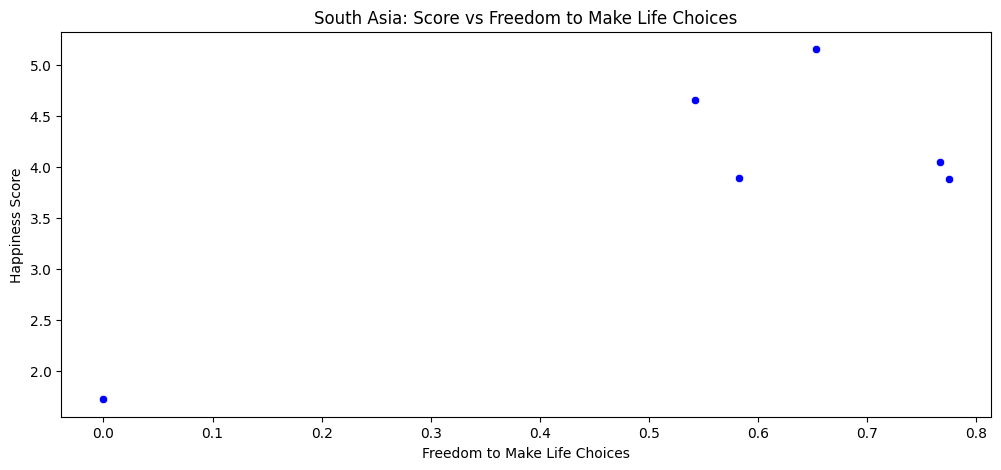

In [48]:
# Create scatter plots for South Asia
plt.figure(figsize=(12, 5))

# Scatter plot for Freedom to Make Life Choices

sns.scatterplot(data=south_asia_df, x='Freedom to make life choices', y='score', color='blue')
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

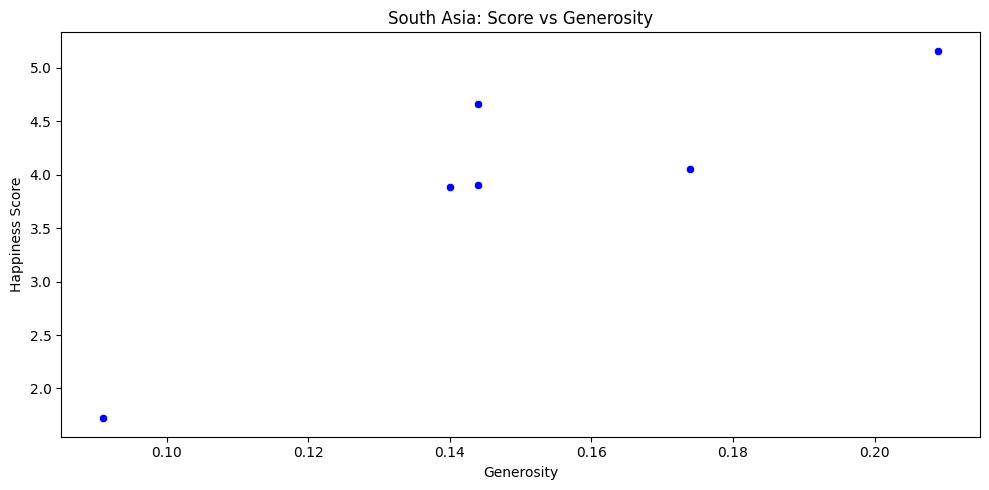

In [49]:
# Scatter plot for Generosity
plt.figure(figsize=(10, 5))

sns.scatterplot(data=south_asia_df, x='Generosity', y='score', color='blue')
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Happiness Score')

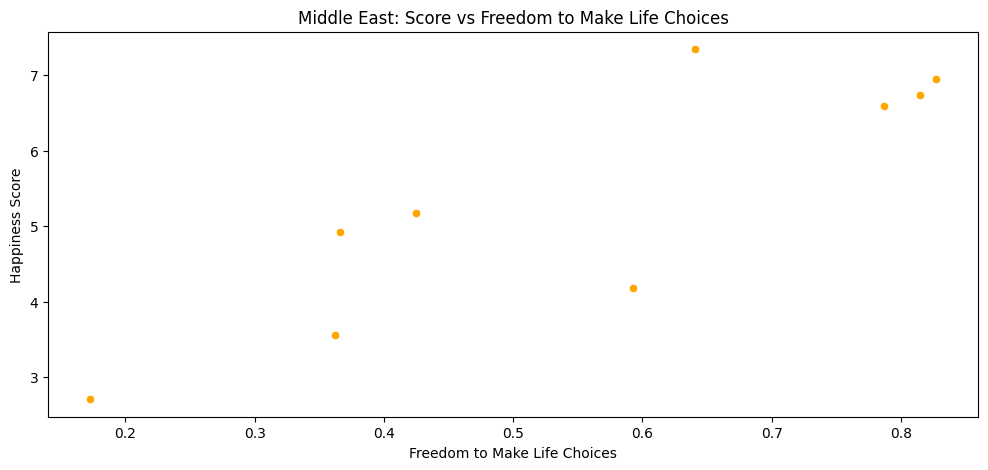

In [50]:
# Create scatter plots for Middle East
plt.figure(figsize=(12, 5))

# Scatter plot for Freedom to Make Life Choices
sns.scatterplot(data=middle_east_df, x='Freedom to make life choices', y='score', color='orange')
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

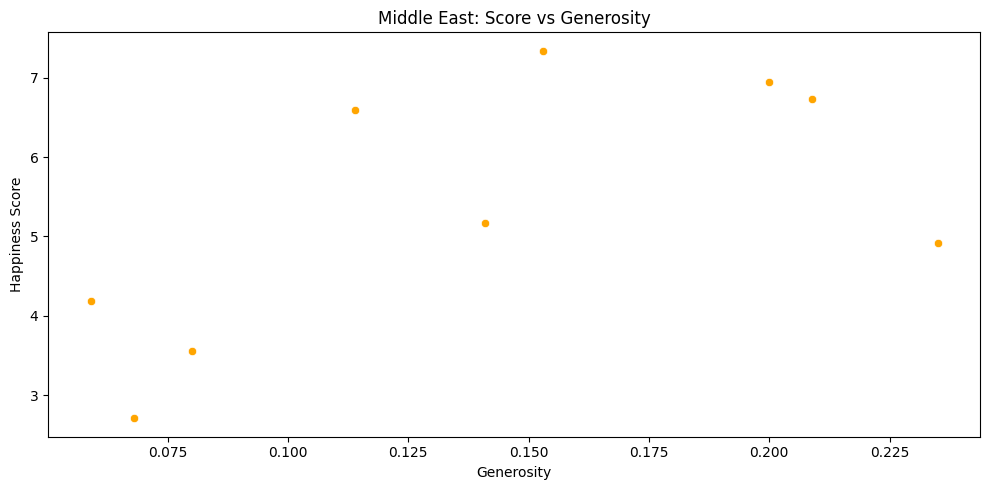

In [51]:
# Scatter plot for Generosity
plt.figure(figsize=(10, 5))
sns.scatterplot(data=middle_east_df, x='Generosity', y='score', color='orange')
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

plt.tight_layout()
plt.show()

**6. Outlier Detection:**

• Identify outlier countries in both regions based on Score and GDP per Capita.



In [52]:
# Function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [53]:
# Identify outliers for South Asia
south_asia_score_outliers = identify_outliers(south_asia_df, 'score')
south_asia_gdp_outliers = identify_outliers(south_asia_df, 'Log GDP per capita')

# Identify outliers for Middle East
middle_east_score_outliers = identify_outliers(middle_east_df, 'score')
middle_east_gdp_outliers = identify_outliers(middle_east_df, 'Log GDP per capita')

# Print outlier countries
print("South Asia Score Outliers:")
print(south_asia_score_outliers[['Country name', 'score']])
print("\nSouth Asia GDP Outliers:")
print(south_asia_gdp_outliers[['Country name', 'Log GDP per capita']])

print("\nMiddle East Score Outliers:")
print(middle_east_score_outliers[['Country name', 'score']])
print("\nMiddle East GDP Outliers:")
print(middle_east_gdp_outliers[['Country name', 'Log GDP per capita']])

South Asia Score Outliers:
  Country name  score
5  Afghanistan  1.721

South Asia GDP Outliers:
  Country name  Log GDP per capita
5  Afghanistan               0.628

Middle East Score Outliers:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East GDP Outliers:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


**• Plot these outliers and discuss their implications.**

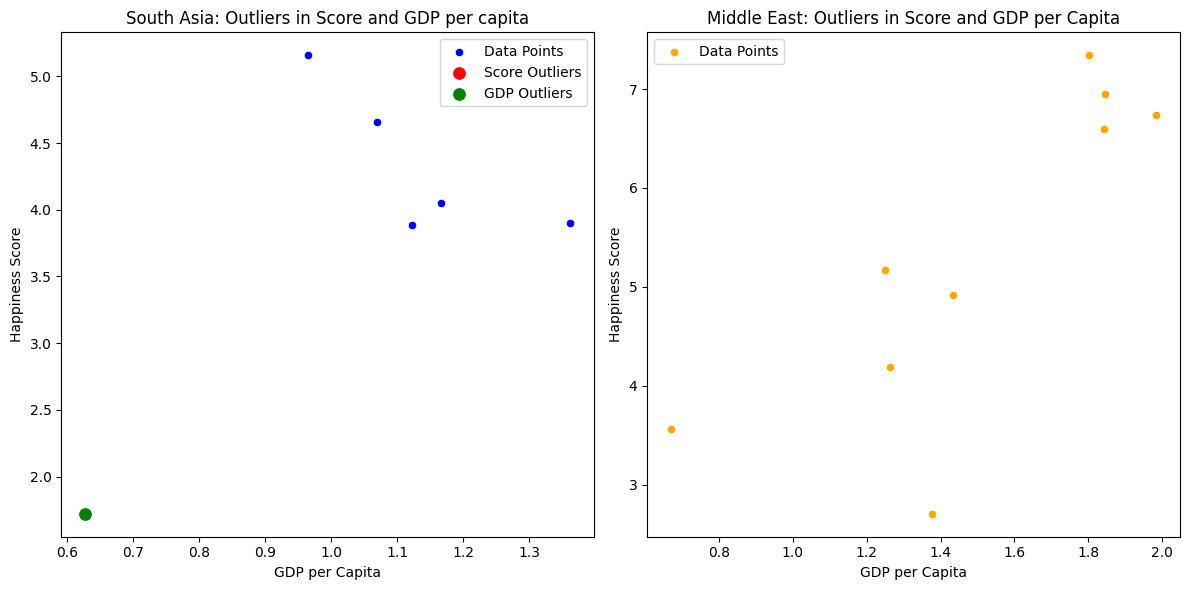

In [54]:
# Plotting the outliers
plt.figure(figsize=(12, 6))

# Scatter plot for South Asia
plt.subplot(1, 2, 1)
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', color='blue', label='Data Points')
sns.scatterplot(data=south_asia_score_outliers, x='Log GDP per capita', y='score', color='red', label='Score Outliers', s=100)
sns.scatterplot(data=south_asia_gdp_outliers, x='Log GDP per capita', y='score', color='green', label='GDP Outliers', s=100)
plt.title('South Asia: Outliers in Score and GDP per capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()


# Scatter plot for Middle East
plt.subplot(1, 2, 2)
sns.scatterplot(data=middle_east_df, x='Log GDP per capita', y='score', color='orange', label='Data Points')
sns.scatterplot(data=middle_east_score_outliers, x='Log GDP per capita', y='score', color='red', label='Score Outliers', s=100)
sns.scatterplot(data=middle_east_gdp_outliers, x='Log GDP per capita', y='score', color='green', label='GDP Outliers', s=100)
plt.title('Middle East: Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()

plt.tight_layout()
plt.show()

Finding outliers in happiness scores and GDP per capita can show big differences between countries, pointing out social and economic issues that need more attention and specific solutions.


**7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.**


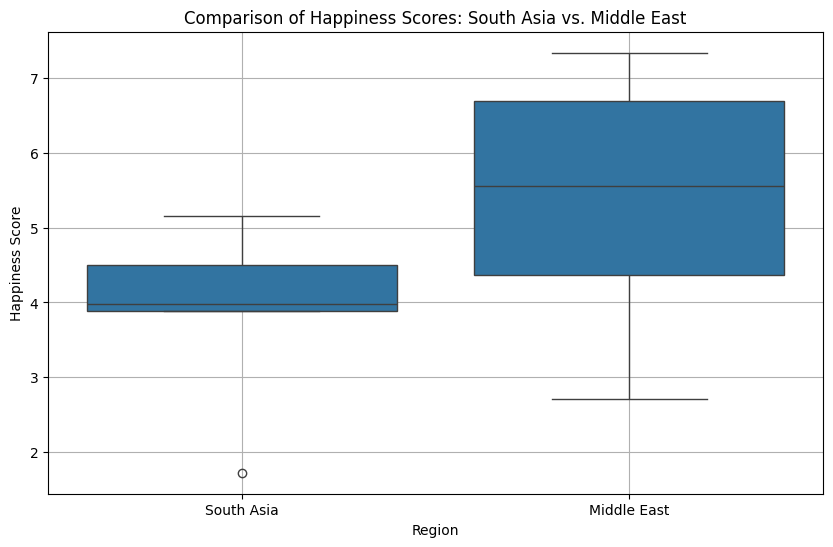

In [58]:
# Create boxplots

# Add a 'Region' column to each DataFrame
south_asia_df['Region'] = 'South Asia'
middle_east_df['Region'] = 'Middle East'

# Concatenate the DataFrames
combined_df = pd.concat([south_asia_df, middle_east_df])

# Now you can create the boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Comparison of Happiness Scores: South Asia vs. Middle East')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()


**Interpret the key differences in distribution shapes, medians, and outliers.**

The boxplots reveal that South Asia generally has lower median happiness scores and a more skewed distribution with notable outliers, indicating significant disparities and challenges, while the Middle East shows higher median scores and a more uniform distribution, suggesting greater consistency in happiness levels across its countries.